# Passengers

In [2]:
import pandas as pd
d=pd.read_csv(r"C:\Users\asus\Downloads\archive (6)\AirPassengers.csv")

In [3]:
d.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.4067
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2964
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.1967
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.1341
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0829
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step


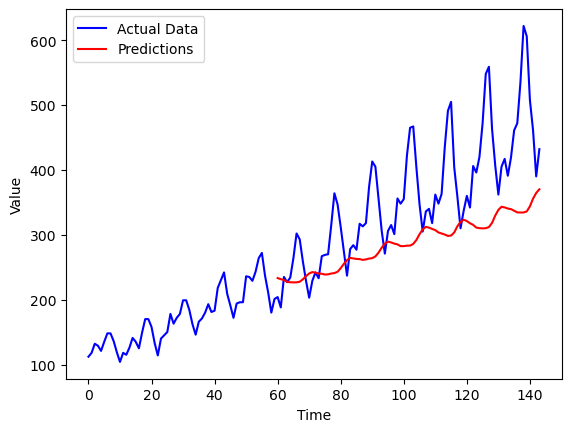

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Load Data
data = pd.read_csv(r"C:\Users\asus\Downloads\passenger\AirPassengers.csv")  # Replace with 'GOOG.csv' or 'airlines_passenger.csv'
data = data[['#Passengers']]  # For stock prices, use 'Close'; for passengers, use 'Passengers'
data = data.values  # Extract values as a numpy array

# 2. Scale Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# 3. Prepare Data for LSTM
sequence_length = 60  # Use past 60 days/months to predict the next day/month
x_train, y_train = [], []

for i in range(sequence_length, len(data)):
    x_train.append(data[i-sequence_length:i, 0])
    y_train.append(data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  # Reshape for LSTM

# 4. Build the Model
model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], 1)))
model.add(Dense(1))  # Output layer with one neuron

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=5, batch_size=32)

# 5. Predict and Plot
predictions = model.predict(x_train)
predictions = scaler.inverse_transform(predictions)  # Scale back to original values

# Plot the results
plt.plot(scaler.inverse_transform(data), color='blue', label='Actual Data')
plt.plot(range(sequence_length, sequence_length + len(predictions)), predictions, color='red', label='Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


Epoch 1/5


C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.1692
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0892
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0353
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0148
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0306
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step


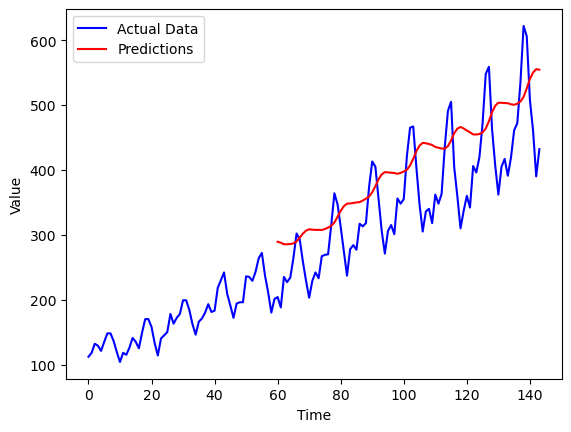

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The predicted value for the next day/month is: 552.6038208007812


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and scale data
data = pd.read_csv(r"C:\Users\asus\Downloads\passenger\AirPassengers.csv")[['#Passengers']].values
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Prepare training data
sequence_length = 60
x_train, y_train = [], []

for i in range(sequence_length, len(data)):
    x_train.append(data[i-sequence_length:i, 0])  # Collect 60 time steps
    y_train.append(data[i, 0])  # Predict next value (next time step)

# Convert to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape for LSTM (samples, time steps, features)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

# Build and train the model
model = Sequential([
    LSTM(50, input_shape=(x_train.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Predict and plot the training data
predictions = scaler.inverse_transform(model.predict(x_train))
plt.plot(scaler.inverse_transform(data), color='blue', label='Actual Data')
plt.plot(range(sequence_length, sequence_length + len(predictions)), predictions, color='red', label='Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Predict the next day (or next time step) after the last data point
last_sequence = data[-sequence_length:].reshape(1, sequence_length, 1)  # Last 60 values
next_prediction = model.predict(last_sequence)

# Inverse transform the prediction to get the original value
next_prediction = scaler.inverse_transform(next_prediction)

print(f"The predicted value for the next day/month is: {next_prediction[0][0]}")


# for SimpleRnn AnD GRU

Epoch 1/5


C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.2333
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.1636
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0976
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0559 
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0249
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step


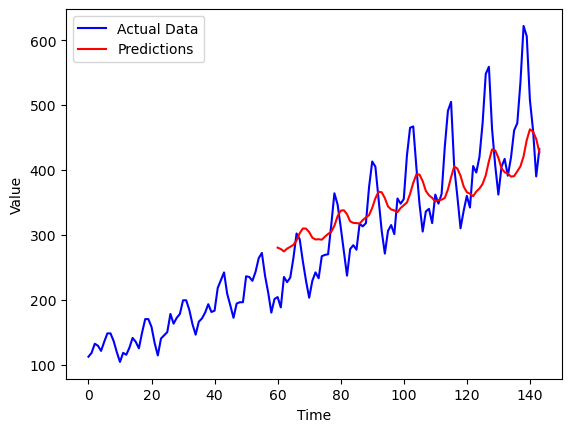

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
The predicted value for the next day (using GRU) is: 418.29693603515625


C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0539 
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0217
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0090
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0084
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0073
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step


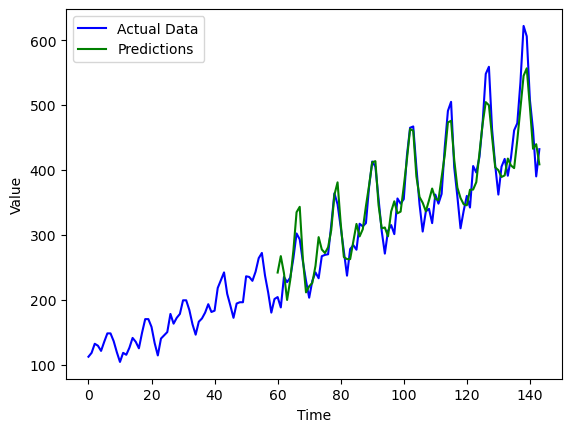

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
The predicted value for the next day (using SimpleRNN) is: 396.72998046875


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, SimpleRNN, Dense

# Load and scale data
data = pd.read_csv(r"C:\Users\asus\Downloads\passenger\AirPassengers.csv")[['#Passengers']].values
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Prepare training data
sequence_length = 60
x_train, y_train = [], []

for i in range(sequence_length, len(data)):
    x_train.append(data[i-sequence_length:i, 0])  # Collect 60 time steps
    y_train.append(data[i, 0])  # Predict next value (next time step)

# Convert to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape for RNN (samples, time steps, features)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

# Choose between GRU or SimpleRNN (comment out one as needed)

# Using GRU
model_gru = Sequential([
    GRU(50, input_shape=(x_train.shape[1], 1)),
    Dense(1)
])
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
model_gru.fit(x_train, y_train, epochs=5, batch_size=32)

# Predict and plot for GRU
predictions_gru = scaler.inverse_transform(model_gru.predict(x_train))
plt.plot(scaler.inverse_transform(data), color='blue', label='Actual Data')
plt.plot(range(sequence_length, sequence_length + len(predictions_gru)), predictions_gru, color='red', label='Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Predict the next day using GRU
last_sequence = data[-sequence_length:].reshape(1, sequence_length, 1)  # Last 60 values
next_prediction_gru = model_gru.predict(last_sequence)

# Inverse transform the prediction to get the original value
next_prediction_gru = scaler.inverse_transform(next_prediction_gru)

print(f"The predicted value for the next day (using GRU) is: {next_prediction_gru[0][0]}")

# ----------------------------------------------------------------------------------

# Using SimpleRNN
model_rnn = Sequential([
    SimpleRNN(50, input_shape=(x_train.shape[1], 1)),
    Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the SimpleRNN model
model_rnn.fit(x_train, y_train, epochs=5, batch_size=32)

# Predict and plot for SimpleRNN
predictions_rnn = scaler.inverse_transform(model_rnn.predict(x_train))
plt.plot(scaler.inverse_transform(data), color='blue', label='Actual Data')
plt.plot(range(sequence_length, sequence_length + len(predictions_rnn)), predictions_rnn, color='green', label='Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Predict the next day using SimpleRNN
next_prediction_rnn = model_rnn.predict(last_sequence)

# Inverse transform the prediction to get the original value
next_prediction_rnn = scaler.inverse_transform(next_prediction_rnn)

print(f"The predicted value for the next day (using SimpleRNN) is: {next_prediction_rnn[0][0]}")


# google 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess the data
data = pd.read_csv(r"C:\Users\asus\Downloads\google stock\GOOGL.csv", parse_dates=['Date'], index_col='Date')  # Make sure to specify the correct column names
data = data[['Close']]  # Use only the 'Close' column for predictions



C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 27s 80ms/step - loss: 0.0109
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 1.8173e-04
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - loss: 1.5434e-04
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - loss: 1.8090e-04
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 1.6265e-04
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 1.4181e-04
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 1.4860e-04
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - loss: 1.2288e-04
Epoch 9/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - loss: 1.4336e-04
Epoch 10/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - loss: 1.2746e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted closing price for the next day: $2681.80


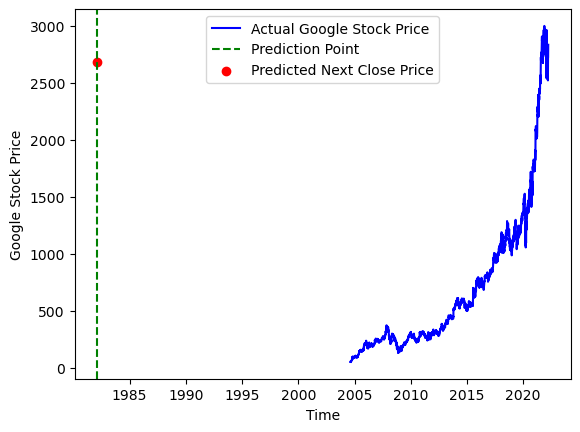

In [6]:
data_values = data.values

# 2. Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_values)

# 3. Prepare Training Data
sequence_length = 60  # 60-day lookback
x_train, y_train = [], []

for i in range(sequence_length, len(scaled_data)):
    x_train.append(scaled_data[i-sequence_length:i, 0])
    y_train.append(scaled_data[i, 0])

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data for LSTM: [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# 4. Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

# 5. Testing and Visualization

# Get the last 60-day sequence to predict future prices
test_data = scaled_data[-sequence_length:]
x_test = np.array([test_data])  # Reshape to (1, sequence_length, 1)
predicted_price = model.predict(x_test)

# Scale back the predicted price to the original range
predicted_price = scaler.inverse_transform(predicted_price)

# Print the predicted closing price
print(f"Predicted closing price for the next day: ${predicted_price[0][0]:.2f}")

# Plot the actual and predicted data
train_data = data[:len(data)-1]  # Original data up to the last day used
plt.plot(data, color='blue', label='Actual Google Stock Price')
plt.axvline(x=len(train_data), color='green', linestyle='--', label='Prediction Point')
plt.scatter(len(train_data), predicted_price, color='red', label='Predicted Next Close Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# final short

C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - loss: 0.0116
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - loss: 1.5550e-04
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - loss: 1.3236e-04
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - loss: 1.5163e-04
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - loss: 1.4231e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted next closing price: $2620.42


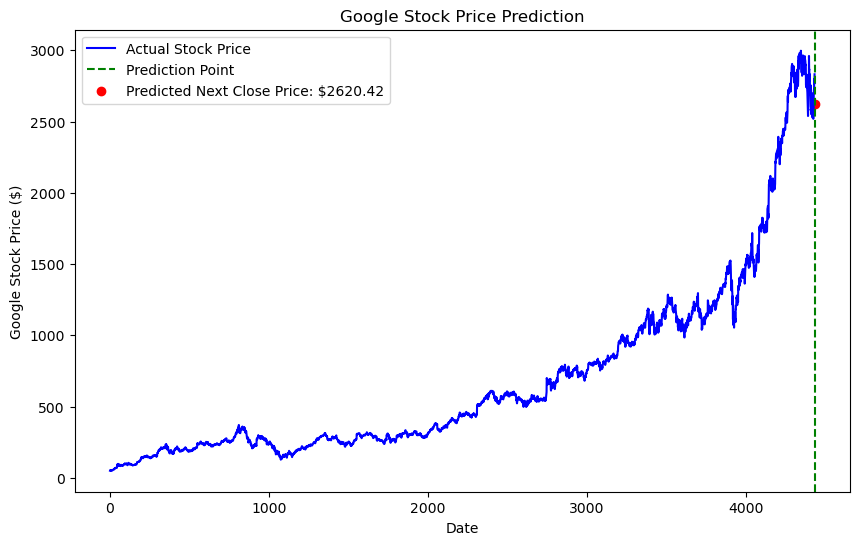

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess data
data = pd.read_csv(r"C:\Users\asus\Downloads\google stock\GOOGL.csv", usecols=['Close'])
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Prepare training data (60-day sequences)
x_train, y_train = [], []
for i in range(60, len(scaled_data)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build and train LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Predict next day's closing price
last_60_days = scaled_data[-60:]
x_test = np.array([last_60_days])
predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

# Print predicted next closing price
print(f"Predicted next closing price: ${predicted_price[0][0]:.2f}")

# Plotting
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Close'], color='blue', label='Actual Stock Price')
plt.axvline(x=data.index[-1], color='green', linestyle='--', label='Prediction Point')
plt.scatter(data.index[-1], predicted_price, color='red', label=f'Predicted Next Close Price: ${predicted_price[0][0]:.2f}')
plt.xlabel('Date')
plt.ylabel('Google Stock Price ($)')
plt.title('Google Stock Price Prediction')
plt.legend(loc='best')
plt.show()


# 